In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [197]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [201]:
import matplotlib.pyplot as plt
import numpy as np 

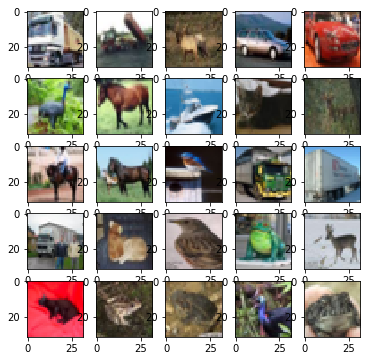

In [258]:
fig=plt.figure(figsize=(6,6))
for i in range (1,26):
    fig.add_subplot(5,5,i)
    plt.imshow(x_train[i])

In [267]:
Truck=np.array(x_train[1].reshape(3072,1))
Peacock=np.array(x_train[6].reshape(3072,1))
for i in range(30):
    if y_train[i]==9:
        Truck=np.append(Truck,np.asarray(x_train[i].reshape(3072,1)),axis=1)
    elif y_train[i]==2:
        Peacock=np.append(Peacock,np.asarray(x_train[i].reshape(3072,1)),axis=1)
        

In [268]:
print(Truck.shape,Peacock.shape)

(3072, 6) (3072, 5)


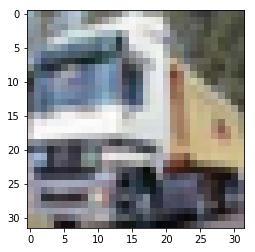

In [269]:
plt.imshow(x_train[1])

(3072, 1)


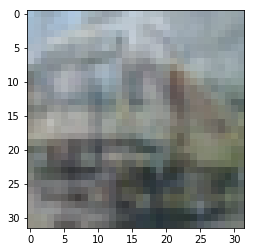

In [270]:
T=np.mean(Truck,axis=1).reshape(3072,1)
print(T.shape)
T=T.reshape(32,32,3)
plt.imshow(T.astype('uint8'))

(3072, 1)


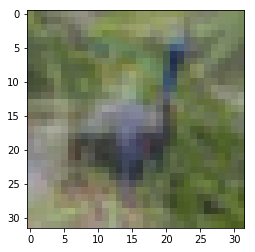

In [271]:
P=np.mean(Peacock,axis=1).reshape(3072,1)
print(P.shape)
P=P.reshape(32,32,3)
plt.imshow(P.astype('uint8'))


In [126]:
(x_train2,y_train2),(x_test2,y_test2)=tf.keras.datasets.mnist.load_data()

In [168]:
x2=np.array(x_train2[1].reshape(784,1))
for i in range(30000):
    if y_train2[i]==0:
        a2=np.asarray(x_train2[i].reshape(784,1))
        x2=np.append(x2,a2,axis=1)

(784, 1)
(28, 28)


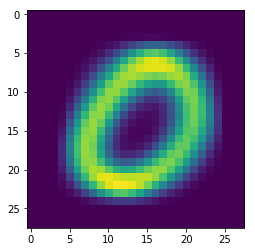

In [169]:
new2=np.mean(x2,axis=1).reshape(784,1)
print(new2.shape)
new2=new2.reshape(28,28)
print(new2.shape)
plt.imshow(new2.astype('uint8'))

In [272]:
x_train=tf.keras.utils.normalize(x_train,axis=1).reshape(x_train.shape[0], -1)
x_test=tf.keras.utils.normalize(x_test,axis=1).reshape(x_test.shape[0], -1)

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)


Train on 50000 samples
Epoch 1/3
50000/50000 [==============================] - 58s 1ms/sample - loss: 2.0184 - accuracy: 0.2620
Epoch 2/3
50000/50000 [==============================] - 11s 228us/sample - loss: 1.8594 - accuracy: 0.3325
Epoch 3/3
50000/50000 [==============================] - 12s 234us/sample - loss: 1.7903 - accuracy: 0.3632


In [281]:
input_shape=x_train.shape[1:]
print(input_shape)

(3072,)


In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:].reshape(3072,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
              batch_size=32,
              epochs=3,
              validation_data=(x_test, y_test),
              shuffle=True)